In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from IPython import display
#from bertviz import head_view
from transformers import AutoModel, AutoTokenizer
import torch

/Users/Emma/Desktop/capstone/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [72]:
#from accelerate import Accelerator
#accelerator = Accelerator()
#print(accelerator.device)
from accelerate.utils import is_bf16_available
print("Accelerate functional:", is_bf16_available())

Accelerate functional: False


In [90]:
model_name = "TsinghuaAI/CPM-Generate" #"TsinghuaAI/CPM-Generate" #"deepseek-ai/DeepSeek-V3" #"hfl/chinese-bert-wwm" #"bert-base-chinese"

from transformers import AutoTokenizer, AutoModelForCausalLM
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)
'''model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="cpu",
    torch_dtype=torch.float32,  
    trust_remote_code=True     
)'''

#new_tokens = ["我们", "柠檬"]
#tokenizer.add_tokens(new_tokens)
#model.resize_token_embeddings(len(tokenizer))

inputs = tokenizer("我们喝了柠檬水,很高兴", return_tensors="pt")
outputs = model(**inputs)

In [92]:
print(inputs)

{'input_ids': tensor([[  101,  1069,    14, 10382,   332,     8,     9,    46,     8,  3976,
             4,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [91]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

['▁我们', '▁喝', '▁了', '▁柠檬', '水', '▁', ',', '▁很', '▁', '高兴', '<sep>', '<cls>']

In [96]:
layer = 0
head = 0

attention_matrix = torch.stack(outputs.attentions)#.cpu()[layer][0][head].detach().numpy()
print(attention_matrix.shape)
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
#remove punctuation, CLS & SEP
punct_idxs = [idx for idx, token in enumerate(tokens) if token in [",", "[CLS]", "[SEP]"]]
tokens = [token for i, token in enumerate(tokens) if i not in punct_idxs]
attention_matrix = np.delete(attention_matrix, punct_idxs, axis = 1)
attention_matrix = np.delete(attention_matrix, punct_idxs, axis = 0)
#attention_matrix = attention_matrix[::-1]
#print(len(attention_matrix))
#sns.heatmap(attention_matrix, xticklabels=tokens, yticklabels=tokens[::-1])
figure = sns.heatmap(attention_matrix, xticklabels=2, yticklabels=2)
print([str(i) + " " + token for i, token in enumerate(tokens)])
figure.invert_yaxis()
plt.show()

torch.Size([32, 1, 32, 12, 12])


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [35]:
print(torch.stack(outputs.attentions).cpu()[layer].size())

torch.Size([1, 12, 26, 26])


In [93]:
print(attention_matrix)

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.48209766 0.5179024  0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.34319267 0.3738139  0.2829935  0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.2799628  0.26495343 0.23808253 0.21700123 0.         0.
  0.         0.         0.         0.         0.        ]
 [0.2404254  0.2891912  0.11489807 0.20325439 0.15223093 0.
  0.         0.         0.         0.         0.        ]
 [0.12110513 0.25041535 0.12876868 0.14214961 0.17870513 0.17885612
  0.         0.         0.         0.         0.        ]
 [0.12101222 0.14423935 0.09388452 0.11433482 0.12334882 0.12711363
  0.12737626 0.         0.         0.         0.        ]
 [0.0818101  0.17601867 0.07869785 0.09813227 0.1148169  0.11276352
  0.11459348 0.11134317 0.         0.         0.        ]
 [0.12553701 0.09839315 0.082068

<Axes: >

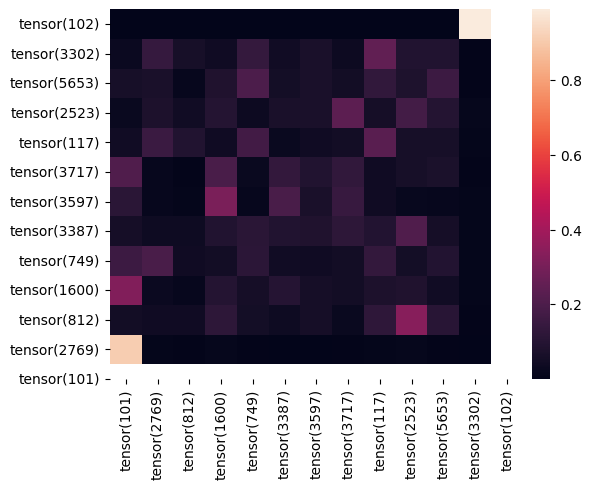

In [18]:
sns.heatmap(attention_matrix, xticklabels=inputs["input_ids"][0], yticklabels=list(inputs["input_ids"][0])[::-1])